In [ ]:
import pip
pip.main(['install', 'pandas'])
pip.main(['install', 'matplotlib'])
pip.main(['install', 'seaborn'])
pip.main(['install', 'scikit-learn'])

# CHARGEMENT DES BIBLIOTHEQUES

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Chargement du jeu de données ENTETES TICKET V4.

In [161]:
dataset_path = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\ENTETES_TICKET_V4.csv"
data2 = pd.read_csv(dataset_path, sep='|', low_memory=False)
print(data2.shape)
print(list(data2.columns))


(6714173, 5)
['IDTICKET', 'TIC_DATE', 'MAG_CODE', 'IDCLIENT', 'TIC_TOTALTTC']


La ligne de code ci-dessous nous permet de connaître le détail des colonnes ainsi que le type de données constituant notre base (numérique ou caractères).

In [162]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714173 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      int64  
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      float64
 4   TIC_TOTALTTC  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 256.1+ MB


Aperçu de notre jeu de données. 

In [163]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,2016-01-02 11:01:33,ALB,2995104.0,"12,9"
1,50100150511,2016-01-02 11:02:10,ALB,1411117.0,"131,06"
2,50100150515,2016-01-02 12:03:27,ALB,222592.0,"34,69"
3,50100150517,2016-01-02 14:23:21,ALB,2979958.0,"97,58"
4,50100150518,2016-01-02 14:26:53,ALB,2858676.0,"4,7"
...,...,...,...,...,...
6714168,1340300014404,2016-12-27 16:31:52,RMA,2292927.0,"59,45"
6714169,1340300014407,2016-12-27 16:35:21,RMA,3189844.0,"26,9"
6714170,1340300014409,2016-12-27 16:38:59,RMA,3125998.0,"22,15"
6714171,1340300014438,2016-12-27 17:17:30,RMA,3252348.0,"118,01"


Afin d'exploiter de façon optimale les informations, nous allons convetir les l'ID TICKET et le NUM LIGNE TICKET en caractère. A l'inverse, nous devons convertir le total TTC en valeur numérique.

In [164]:
data2['IDTICKET'] = data2['IDTICKET'].astype(str)
data2['IDCLIENT'] = data2['IDCLIENT'].astype(str)

In [165]:
data2['TIC_TOTALTTC'] = data2['TIC_TOTALTTC'].str.replace(',', '.')

In [166]:
data2['TIC_TOTALTTC'] = data2['TIC_TOTALTTC'].str.strip('\"')

In [167]:
data2['TIC_TOTALTTC'] = pd.to_numeric(data2['TIC_TOTALTTC'], errors='coerce')

Vérification du traitement.

In [168]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714173 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      object 
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      object 
 4   TIC_TOTALTTC  float64
dtypes: float64(1), object(4)
memory usage: 256.1+ MB


In [169]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,2016-01-02 11:01:33,ALB,2995104.0,12.90
1,50100150511,2016-01-02 11:02:10,ALB,1411117.0,131.06
2,50100150515,2016-01-02 12:03:27,ALB,222592.0,34.69
3,50100150517,2016-01-02 14:23:21,ALB,2979958.0,97.58
4,50100150518,2016-01-02 14:26:53,ALB,2858676.0,4.70
...,...,...,...,...,...
6714168,1340300014404,2016-12-27 16:31:52,RMA,2292927.0,59.45
6714169,1340300014407,2016-12-27 16:35:21,RMA,3189844.0,26.90
6714170,1340300014409,2016-12-27 16:38:59,RMA,3125998.0,22.15
6714171,1340300014438,2016-12-27 17:17:30,RMA,3252348.0,118.01


La ligne de code ci-dessous nous permet de formater le format de la date.

In [170]:
from datetime import datetime
data2['TIC_DATE'] = pd.to_datetime(data2['TIC_DATE'], format="%Y-%m-%d %H:%M:%S")
data2['TIC_DATE'] = data2['TIC_DATE'].dt.strftime("%d/%m/%Y")

Vérification du traitement.

In [171]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,02/01/2016,ALB,2995104.0,12.90
1,50100150511,02/01/2016,ALB,1411117.0,131.06
2,50100150515,02/01/2016,ALB,222592.0,34.69
3,50100150517,02/01/2016,ALB,2979958.0,97.58
4,50100150518,02/01/2016,ALB,2858676.0,4.70
...,...,...,...,...,...
6714168,1340300014404,27/12/2016,RMA,2292927.0,59.45
6714169,1340300014407,27/12/2016,RMA,3189844.0,26.90
6714170,1340300014409,27/12/2016,RMA,3125998.0,22.15
6714171,1340300014438,27/12/2016,RMA,3252348.0,118.01


Cette ligne de code nous permet d'identifier le nombre d'occurence de chaque code magasin, pour identifier les éventuels regroupements à effectuer. 

In [172]:
#modalités variables:
data2['MAG_CODE'].value_counts(dropna = False)

MAG_CODE
SSM    246506
MOB    221283
HEI    219713
BEA    205468
GEX    196669
        ...  
CLI     31063
STR     26694
SCH     25502
BAR     18254
SAL     18245
Name: count, Length: 66, dtype: int64

La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) en doublons.

In [173]:
print(data2.duplicated().sum())
data = data2.drop_duplicates()

0


La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) manquante(s)

In [174]:
pd.DataFrame(index=data.columns, columns=['%_missing_values'], data= (data.isna().sum().values / len(data)*100))

,%_missing_values
IDTICKET,0.0
TIC_DATE,0.0
MAG_CODE,0.0
IDCLIENT,0.0
TIC_TOTALTTC,0.0


Il convient à présent de vérifier la présence de valeur aberrantes.

<Axes: >

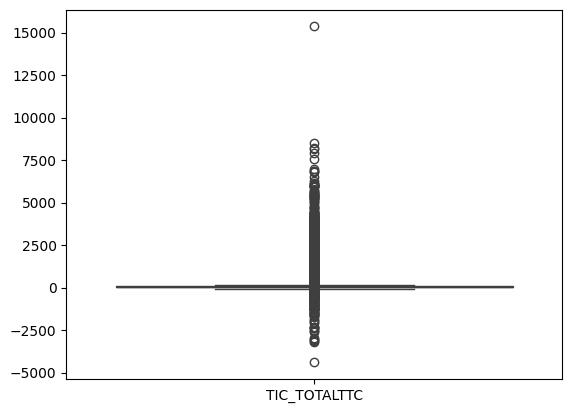

In [175]:
#1ère méthode boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation des boxplots des variables numériques
sns.boxplot(data2)

La série de code ci-dessous permet de traiter les valeurs aberrantes en présence.

In [176]:
''' Detection '''
# IQR
Q1 = np.percentile(data2['TIC_TOTALTTC'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data2['TIC_TOTALTTC'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data2.shape)

Old Shape:  (6714173, 5)


In [177]:
# Upper bound
upper = np.where(data2['TIC_TOTALTTC'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data2['TIC_TOTALTTC'] <= (Q1-1.5*IQR))

In [178]:
''' Removing the Outliers '''
data2.drop(upper[0], inplace = True)
data2.drop(lower[0], inplace = True)

In [179]:
print("New Shape: ", data2.shape)

New Shape:  (6278461, 5)


CALCUL DU NOMBRES DE MAGASINS (Mag Code) FREQUENTE PAR UN CLIENT (ID Client).

In [180]:
data2['IDCLIENT'] = data2['IDCLIENT'].astype(float)

In [181]:
data2['IDCLIENT'] = data2['IDCLIENT'].astype(int)

In [182]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6278461 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      object 
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      int32  
 4   TIC_TOTALTTC  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 263.5+ MB


In [183]:
FREQUENCE_MAG = data2.groupby('IDCLIENT')['MAG_CODE'].nunique()

In [184]:
data2.insert(loc=5, column='FREQUENCE_MAG', value=FREQUENCE_MAG)

In [185]:
data2['FREQUENCE_MAG'].value_counts()

FREQUENCE_MAG
1.0     551738
2.0     107580
3.0      14591
4.0       2358
5.0        412
6.0         75
7.0         32
8.0          8
9.0          3
11.0         2
28.0         1
10.0         1
15.0         1
20.0         1
Name: count, dtype: int64

CALCUL D'ANCIENNETE ENTRE LES 2 DERNIERES COMMANDES (TIC DATE) D'UN CLIENT (ID Client).

In [36]:
data2['TIC_DATE'] = pd.to_datetime(data2['TIC_DATE'], format='%d/%m/%Y', errors='coerce')

In [37]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,ANCIENNETE_CDE,FREQUENCE_MAG
1030801,290200148293,2016-01-20,PRI,10000.0,31.98,NaT,NaN
1043255,290400188646,2016-02-02,PRI,10000.0,7.80,13 days,NaN
1009491,290100590130,2016-02-04,PRI,10000.0,19.60,2 days,NaN
992585,290100593170,2016-02-26,PRI,10000.0,11.21,22 days,NaN
1302906,380100650588,2016-03-03,STE,10000.0,4.50,6 days,NaN
...,...,...,...,...,...,...,...
1684500,470500212485,2016-05-16,FRV,99999.0,48.19,NaT,NaN
1688571,470200146503,2016-05-28,FRV,99999.0,29.75,12 days,NaN
1650489,470100318222,2016-07-02,FRV,99999.0,16.60,35 days,NaN
1650614,470100318375,2016-07-02,FRV,99999.0,19.92,0 days,NaN


In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6278461 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   IDTICKET      object        
 1   TIC_DATE      datetime64[ns]
 2   MAG_CODE      object        
 3   IDCLIENT      object        
 4   TIC_TOTALTTC  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 287.4+ MB


In [27]:
data2.sort_values(by=['IDCLIENT', 'TIC_DATE'], inplace=True)

In [30]:
ANCIENNETE_CDE = data2.groupby('IDCLIENT')['TIC_DATE'].diff()

In [31]:
print(ANCIENNETE_CDE)

1030801       NaT
1043255   13 days
1009491    2 days
992585    22 days
1302906    6 days
            ...  
1684500       NaT
1688571   12 days
1650489   35 days
1650614    0 days
1653301   40 days
Name: TIC_DATE, Length: 6278461, dtype: timedelta64[ns]


Traitement des valeurs NaT

data2['ANCIENNETE_CDE'] = data2['ANCIENNETE_CDE'].fillna(pd.Timestamp('today').normalize())
data2 = data2.dropna(subset=['ANCIENNETE_CDE'])

data2['ANCIENNETE_CDE']=data2[['ANCIENNETE_CDE']].applymap(lambda x: "Inconnue" if x=='NaT' else x)